# Long-term Investment in SPY

https://finance.yahoo.com/quote/SPY?p=SPY

## SPY Market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

from datetime import datetime
from dateutil import relativedelta

from scipy.stats import norm

In [2]:
# input 'SPY'
name = input("Input desired stock ticker").upper()
start = '2010-01-01'
end = '2023-01-10'

# Read in the data from yfinance using the Adj Close only.
df = yf.download(name,start,end)['Adj Close']

# View Columns
# head
display(df.head())

# tail
display(df.tail())

Input desired stock ticker spy


[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    88.454216
2010-01-05    88.688347
2010-01-06    88.750809
2010-01-07    89.125420
2010-01-08    89.422012
Name: Adj Close, dtype: float64

Date
2023-01-03    380.820007
2023-01-04    383.760010
2023-01-05    379.380005
2023-01-06    388.079987
2023-01-09    387.859985
Name: Adj Close, dtype: float64

In [3]:
# Print minimum value
print("Min: ")
display(df.min())

print()

# print max value
print("Max: ")
display(df.max())

Min: 


80.47676086425781


Max: 


470.08367919921875

In [4]:
# convert inputed start time to datetime format
start = datetime.strptime(start, "%Y-%m-%d")

# convert inputed end time to date time format
end = datetime.strptime(end, "%Y-%m-%d")

# create the delta between start and end time
delta = relativedelta.relativedelta(end,start)

# print the amount of years between start and end
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
13 years


### Starting Cash with 100k to invest in Bonds

In [5]:
# starting cash balance
cash = 100000

In [6]:
print('Number of Shares:')
# calculate number of share by dividing inputted cash to the value of the first dates adj close
shares = int(cash/df.iloc[0])
print(f'{name}: {shares}')

Number of Shares:
SPY: 1130


In [7]:
print('Beginning Value:')

shares = int(cash/df.iloc[0])

# beginning value is based on the first dates adjusted close
begin_value = round(shares * df.iloc[0], 2)
print(f'{name}: ${begin_value}')

Beginning Value:
SPY: $99953.26


In [8]:
print('Current Value:')

shares = int(cash/df.iloc[0])

# current value is based on the most recent dates adjusted close
current_value = round(shares * df.iloc[-1], 2)
print(f'{name}: ${current_value}')

Current Value:
SPY: $438281.78


In [9]:
# calculate the daily returns
returns = df.pct_change().dropna()

# view columns
# head
display(returns.head())

print()

# tail
display(returns.tail())

Date
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
2010-01-11    0.001397
Name: Adj Close, dtype: float64

Date
2023-01-03   -0.004210
2023-01-04    0.007720
2023-01-05   -0.011413
2023-01-06    0.022932
2023-01-09   -0.000567
Name: Adj Close, dtype: float64

In [10]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

Date
2023-01-03    4.305278
2023-01-04    4.338516
2023-01-05    4.288999
2023-01-06    4.387354
2023-01-09    4.384867
Name: Adj Close, dtype: float64


In [11]:
# Print the mean
print("mean : ", returns.mean()*100)

# Print the standard deviation
print("Std. dev: ", returns.std()*100)

# Print the skewness
print("skew: ", returns.skew())

# Print the kurtosis
print("kurt: ", returns.kurtosis())

mean :  0.051310092044796744
Std. dev:  1.1095546392369622
skew:  -0.5145541174104781
kurt:  10.787989528461637


In [12]:
# Calculate total return and annualized return from price data 
# subtract the most recent return price from the initial return price
# divide by the initial returns
total_return = (returns[-1] - returns[0]) / returns[0]
print(total_return)

-1.214172507979777


In [13]:
# Annualize the total return over 12 year 
annualized_return = ((1+total_return)**(1/12))-1

# Calculate annualized volatility from the standard deviation
vol_port = returns.std() * np.sqrt(250)

In [14]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

nan


In [15]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns < target]

# Calculate expected return and std dev of downside
expected_return = returns.mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.051310092044796744
--------------------------------------------------
Downside risk:
0.9133613442350653
--------------------------------------------------
Sortino ratio:
-1.0386797229192193


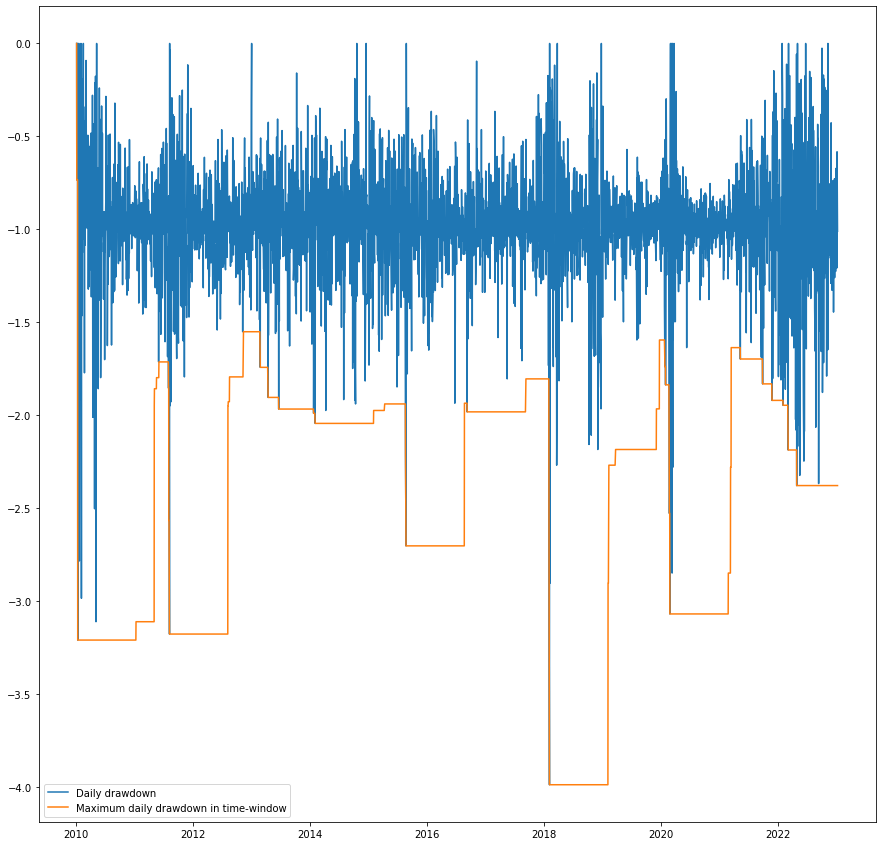

In [16]:
# Calculate the max value 
roll_max = returns.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()

# Save the figure.
plt.savefig(f"./Images/{name}DailyDrawdown.jpg")

plt.show()

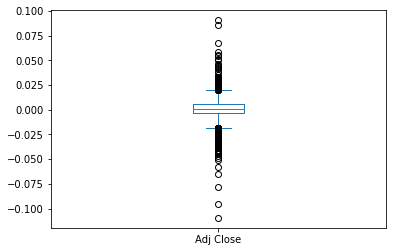

In [17]:
# Box plot
returns.plot(kind='box')

# Save the figure.
plt.savefig(f"./Images/{name}Boxplot.jpg")

In [18]:
print("Stock returns: ")
print(returns.mean())
print('-' * 50)
print("Stock risk:")
print(returns.std())

Stock returns: 
0.0005131009204479675
--------------------------------------------------
Stock risk:
0.01109554639236962


In [19]:
rf = 0.001
Sharpe_Ratio = ((returns.mean() - rf) / returns.std()) * np.sqrt(252)
print('Sharpe Ratio: ', Sharpe_Ratio)

Sharpe Ratio:  -0.6966113245041275


### Value-at-Risk 99% Confidence

In [20]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns).quantile(0.01), 3)

In [21]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.032


In [22]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
3.2%


In [23]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(int(-var99 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$3200


### Value-at-Risk 95% Confidence

In [24]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns).quantile(0.05), 3)

In [25]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.017


In [26]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
1.7%


In [27]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$1700


In [28]:
mean = np.mean(returns)
std_dev = np.std(returns)

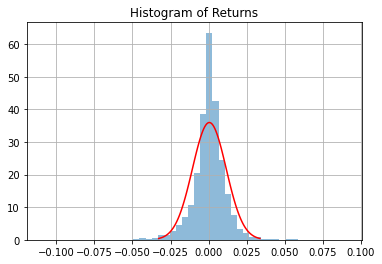

In [29]:
returns.hist(bins=50, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')

# Save the figure.
plt.savefig(f"./Images/{name}HistogramOfReturns.jpg")

plt.show()

In [30]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [31]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0137042
95%                      -0.0177347
99%                      -0.0252951
